In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

seaborn.set()

NumPy提供了高效存储和操作密集数据缓存的接口。在某些方面，NumPy数组与Python内置的列表类型非常相似。但是随着数组在维度上变大，NumPy数组提供了更加高效的存储和数据操作。NumPy数组几乎是整个Python数据科学工具生态系统的核心。

## 2.1 理解Python中的数据类型
要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。本节将介绍在Python语言中数据数组是如何被处理的，并对比NumPy所做的改进。理解这个不同之处是理解本书其他内容的基础。

### 2.1.1 Python整型不仅仅是一个整型
标准的Python实现是用C语言编写的。这意味着每一个Python对象都是一个C语言结构体，该结构体不仅包含其值，还有其他信息。查看Python 3.4的源代码，可以发现长整型的定义，如下所示（C语言的宏经过扩展之后）：
```c
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

Python 3.4中的一个整型实际上包括4个部分:
+ ob_refcnt 是一个引用计数，它帮助 Python 默默地处理内存的分配和回收
+ ob_type 将变量的类型编码
+ ob_size 指定接下来的数据成员的大小
+ ob_digit 包含我们希望 Python 变量表示的实际整型值

这意味着与C语言这样的编译语言中的整型相比，在Python中存储一个整型会有一些开销，正如`图2-1`所示：
<img src="attachment:2-1.png" style="width: 600px;"/>

这里`PyObject_HEAD`是结构体中包含引用计数、类型编码和其他之前提到的内容的部分。两者的差异在于，C语言整型本质上是对应某个内存位置的标签，里面存储的字节会编码成整型。而Python的整型其实是一个指针，指向包含这个Python对象所有信息的某个内存位置，其中包括可以转换成整型的字节，所以Python可以自由、动态地编码。但是，Python类型中的这些额外信息也会成为负担，在多个对象组合的结构体中尤其明显。

### 2.1.2 Python列表不仅仅是一个列表
由于Python的动态类型特性，可以创建一个异构的列表：

In [2]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

这种灵活性要付出一定代价的：为了获得这些灵活的类型，列表中的每一项必须包含各自的类型信息、引用计数和其他信息；也就是说，每一项都是一个完整的Python对象。如果列表中的所有变量都是同一类型的，那么很多信息都会显得多余。动态类型的列表和固定类型的（NumPy式）数组间的区别如图所示：
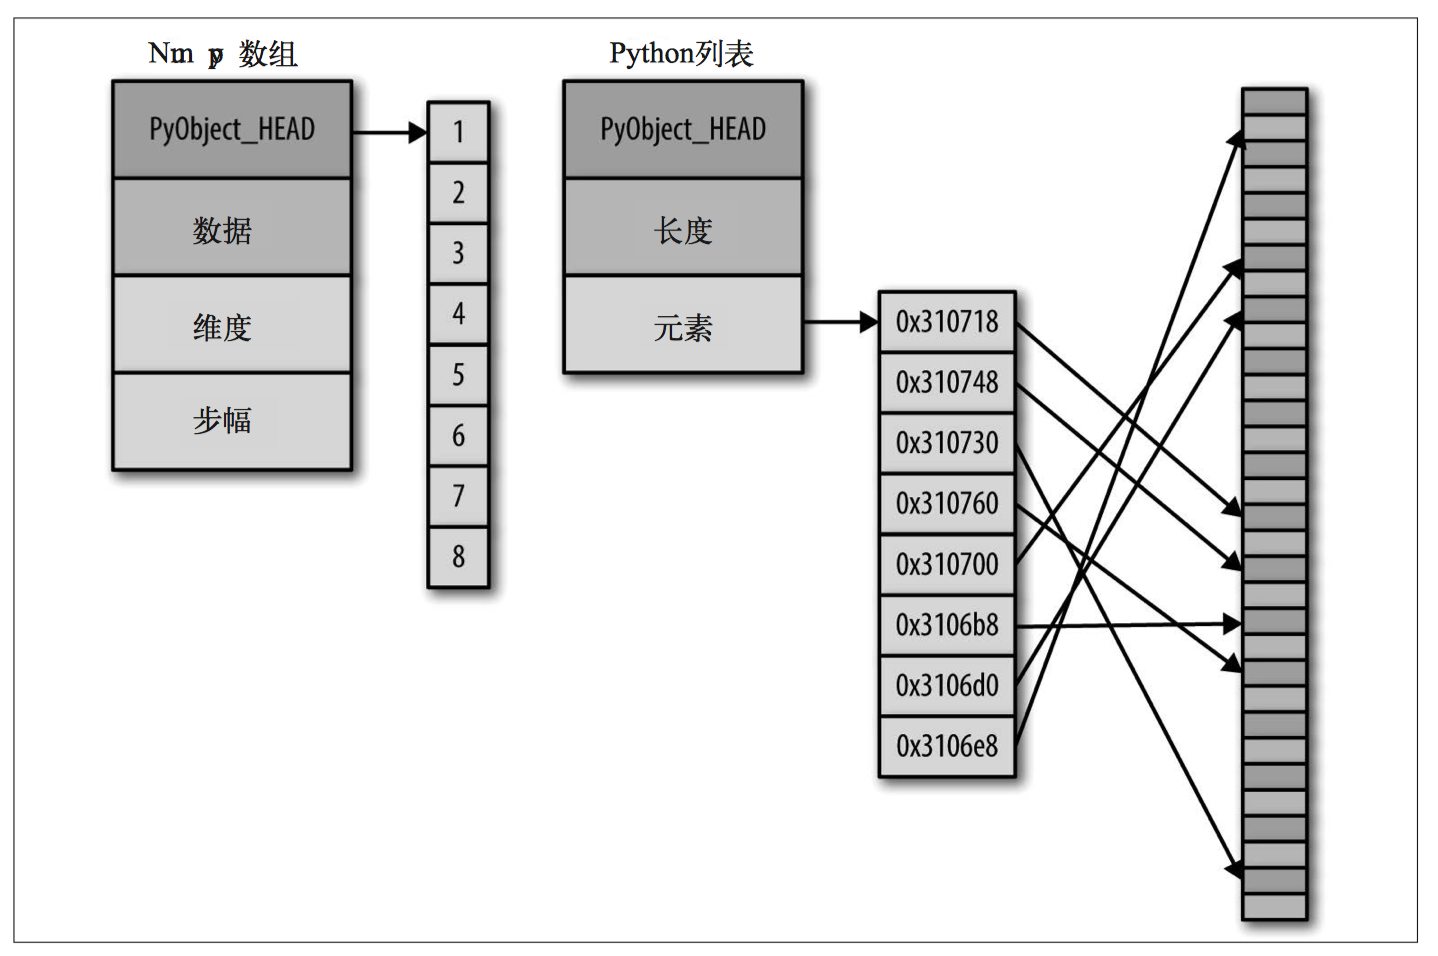


### 2.1.3 Python中的固定类型数组
Python提供了几种将数据存储在有效的、固定类型的数据缓存中的选项。内置的数组(array)模块(在Python 3.3之后可用)可以用于创建统一类型的密集数组：

In [3]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

这里的`i`是一个数据类型码，表示数据为整型。

更实用的是NumPy包中的ndarray对象。Python的数组对象提供了数组型数据的有效存储，而NumPy为该数据加上了高效的操作。

### 2.1.4 从Python列表创建数组
首先，可以用np.array从Python列表创建数组：

In [4]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

请记住，不同于Python列表，NumPy要求数组必须包含同一类型的数据。如果类型不匹配，NumPy将会向上转换（如果可行）。

可以用dtype关键字指定ndarray类型：

In [5]:
np.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

NumPy数组可以被指定为多维的：

In [6]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### 2.1.5 从头创建数组
面对大型数组的时候，用NumPy内置的方法从头创建数组是一种更高效的方法：

In [7]:
# 创建一个长度为10的数组，数组的值都是0
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 创建一个3×5的浮点型数组，数组的值都是1
np.ones((3, 5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [9]:
# 创建一个3×5的浮点型数组，数组的值都是3.14
np.full((3, 5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [10]:
# 从0开始，到20结束，步长为2（它和内置的range()函数类似）
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# 创建一个5个元素的数组，这5个数均匀地分配到0~1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [12]:
# 创建一个3×3的、在0~1均匀分布的随机数组成的数组
np.random.random((3, 3))

array([[ 0.52119078,  0.76493031,  0.4591332 ],
       [ 0.93935134,  0.19892883,  0.60219931],
       [ 0.14323919,  0.0645486 ,  0.16788001]])

In [13]:
# 创建一个3×3的、均值为0、方差为1的
# 正态分布的随机数数组
np.random.normal(0, 1, (3, 3))

array([[ 0.67931601, -0.37196811, -0.58795204],
       [-0.41542829, -0.66496238, -0.0209801 ],
       [ 0.78848926,  0.01341048,  0.59538747]])

In [14]:
# 创建一个3×3的、[0, 10)区间的随机整型数组
np.random.randint(0, 10, (3, 3))

array([[3, 6, 2],
       [8, 5, 3],
       [0, 6, 0]])

In [15]:
# 创建一个3×3的单位矩阵
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [16]:
# 创建一个由3个整型数组成的未初始化的数组
# 数组的值是内存空间中的任意值
np.empty(3)

array([ 1.,  1.,  1.])

### 2.1.6 NumPy标准数据类型
`表2-1`列出了标准NumPy数据类型:
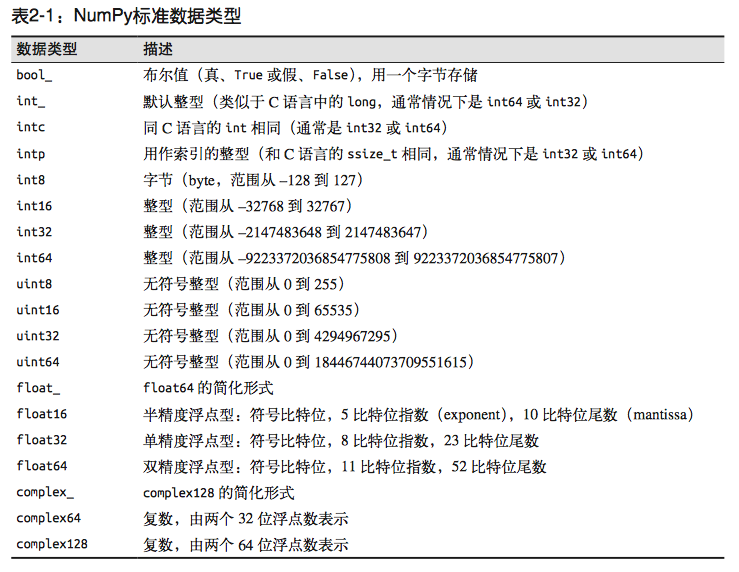

请注意，当构建一个数组时，你可以用一个字符串参数来指定数据类型，或者用相关的NumPy对象来指定：
```python
np.zeros(10, dtype='int16')
np.zeros(10, dtype=np.int16)
```

## 2.2 NumPy数组基础
我们将介绍以下几类基本的数组操作：
+ 数组的属性：确定数组的大小、形状、存储大小、数据类型
+ 数组的索引：获取和设置数组各个元素的值
+ 数组的切分：在大的数组中获取或设置更小的子数组
+ 数组的变形：改变给定数组的形状
+ 数组的拼接和分裂：将多个数组合并为一个，以及将一个数组分裂成多个

### 2.2.1 NumPy数组的属性
首先介绍一些有用的数组属性。定义三个随机的数组：1个1维数组、1个2维数组和1个3维数组：

In [17]:
np.random.seed(0) # 设置随机数种子

x1 = np.random.randint(10, size=6) # 一维数组 
x2 = np.random.randint(10, size=(3, 4)) # 二维数组 
x3 = np.random.randint(10, size=(3, 4, 5)) # 三维数组
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

每个数组有nidm（数组的维度）、shape（数组每个维度的大小）和size（数组的总大小）属性：

In [18]:
x3.ndim, x3.shape, x3.size, x3.dtype

(3, (3, 4, 5), 60, dtype('int64'))

其他的属性包括表示每个数组元素字节大小的itemsize，以及表示数组总字节大小的属性nbytes(一般来说，可以认为nbytes等于itemsize和size的乘积)：

In [19]:
x3.itemsize, x3.nbytes

(8, 480)

### 2.2.2 数组索引：获取单个元素
和Python列表一样，在一维数组中，你也可以通过索引获取值（从0开始计数）：

In [20]:
x1[0], x1[4]

(5, 7)

In [21]:
# 为了获取数组的末尾索引，可以用负值索引
x1[-1], x1[-2]

(9, 7)

在多维数组中，可以用逗号分隔的索引元组获取元素：

In [22]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [23]:
x2[1, 2], x2[0, -1]

(8, 4)

也可以用以上索引方式修改元素值：

In [24]:
x2[0, -1] = 12 
x2

array([[ 3,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

请注意，和Python列表不同，NumPy数组是固定类型的。这意味着当你试图将一个浮点值插入一个整型数组时，浮点值会被截短成整型。并且这种截短是自动完成的，不会给你提示或警告:

In [25]:
x1[0] = 3.14159
x1

array([3, 0, 3, 3, 7, 9])

### 2.2.3 数组切片：获取子数组
可以用切片（slice）符号获取子数组，切片符号用冒号（:）表示。为了获取数组x的一个切片，可以用以下方式：
```python
x[start:stop:step]
```

如果以上3个参数都未指定，那么它们会被分别设置默认值start=0、stop=<维度的大小>和 step=1。

#### 2.2.3.1 一维子数组

In [26]:
x = np.arange(10)
# 前五个元素
x[:5] 

array([0, 1, 2, 3, 4])

In [27]:
# 索引五之后的元素
x[5:]

array([5, 6, 7, 8, 9])

In [28]:
# 中间的子数组
x[4:7] 

array([4, 5, 6])

In [29]:
# 每隔一个元素
x[::2]

array([0, 2, 4, 6, 8])

In [30]:
# 每隔一个元素，从索引1开始
x[1::2] 

array([1, 3, 5, 7, 9])

你可能会在步长值为负时感到困惑。在这个例子中，start参数和stop参数默认是被交换的，因此这是一种非常方便的逆序数组的方式：

In [31]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [32]:
x[5::-2]

array([5, 3, 1])

#### 2.2.3.2 多维子数组
多维切片也采用同样的方式处理：

In [33]:
x2

array([[ 3,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [34]:
# 两行，三列
x2[:2, :3]

array([[3, 5, 2],
       [7, 6, 8]])

In [35]:
# 所有行，每隔一列
x2[:3, ::2]

array([[3, 2],
       [7, 8],
       [1, 7]])

In [36]:
# 子数组维度也可以同时被逆序
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [12,  2,  5,  3]])

#### 2.2.3.3 获取数组的行和列
一种常见的需求是获取数组的单行和单列。你可以将索引与切片组合起来实现这个功能，用一个冒号（:）表示空切片：

In [37]:
# x2的第一列
x2[:, 0]

array([3, 7, 1])

In [38]:
# x2的第一行，也可以使用x2[0]表示
x2[0, :]

array([ 3,  5,  2, 12])

#### 2.2.3.4 非副本视图的子数组
关于数组切片有一点很重要也非常有用，那就是数组切片返回的是数组数据的视图，而不是数值数据的副本。这一点也是NumPy数组切片和Python列表切片的不同之处：在Python列表中，切片是值的副本。这种默认的处理方式实际上非常有用：它意味着在处理非常大的数据集时，可以获取或处理这些数据集的片段，而不用复制底层的数据缓存。

有些时候明确地复制数组里的数据或子数组也是非常有用的。可以很简单地通过copy()方法实现：

In [39]:
x2

array([[ 3,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [40]:
x2_sub = x2[:2, :2]
x2_sub

array([[3, 5],
       [7, 6]])

In [41]:
# 现在如果修改这个子数组，将会看到原始数组也被修改了
x2_sub[0, 0] = 99
x2

array([[99,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [42]:
x2

array([[99,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

#### 2.2.3.5 创建数组的副本
尽管数组视图有一些非常好的特性，但是在有些时候需要明确地复制数组里的数据或子数组：

In [43]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy[0, 0] = 42
x2

array([[99,  5,  2, 12],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

### 2.2.4 数组的变形
数组变形最灵活的实现方式是通过`reshape()`函数来实现。

***请注意，如果希望该方法可行，那么原始数组的大小必须和变形后数组的大小一致。如果满足这个条件，reshape方法将会用到原始数组的一个非副本视图。但实际情况是，在非连续的数据缓存的情况下，返回非副本视图往往不可能实现。***

In [44]:
array = np.arange(1, 10)
grid = array.reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
grid[0,0]=100
array

array([100,   2,   3,   4,   5,   6,   7,   8,   9])

另外一个常见的变形模式是将一个一维数组转变为二维的行或列的矩阵。可以通过reshape方法来实现，或者更简单地在一个切片操作中利用newaxis关键字：

In [46]:
x = np.array([1, 2, 3])
# 通过变形获得的行向量
x.reshape((1, 3))

array([[1, 2, 3]])

In [47]:
# 通过newaxis获得的行向量
x[np.newaxis, :]

array([[1, 2, 3]])

In [48]:
# 通过变形获得的列向量
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [49]:
# 通过newaxis获得的列向量 
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

### 2.2.5 数组拼接和分裂
本节主要关注将多个数组合并为一个、或将一个数组分裂成多个的操作。

#### 2.2.5.1 数组的拼接
拼接或连接NumPy中的两个数组主要由`np.concatenate`、`np.vstack`和`np.hstack`实现。

In [50]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

`np.concatenate`也可以用于二维数组的拼接：

In [51]:
grid = np.array([[1, 2, 3], [4, 5, 6]])

# 沿着第一个轴拼接
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [52]:
# 沿着第二个轴拼接（从0开始索引）
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

沿着固定维度处理数组时，使用`np.vstack`（垂直栈）和`np.hstack`（水平栈）函数会更简洁：

In [53]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])

# 垂直栈数组
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [54]:
# 水平栈数组
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

#### 2.2.5.2 数组的分裂
分裂可以通过`np.split`、`np.hsplit`和`np.vsplit`函数来实现。可以向以上函数传递一个索引列表作为参数，索引列表记录的是分裂点位置：

In [55]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
x1, x2, x3

(array([1, 2, 3]), array([99, 99]), array([3, 2, 1]))

N分裂点会得到N+1个子数组。相关的`np.hsplit`和`np.vsplit`的用法也类似：

In [56]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [57]:
upper, lower = np.vsplit(grid, [2])
upper

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [58]:
lower

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [59]:
left, right = np.hsplit(grid, [2])
left

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [60]:
right

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

## 2.3 NumPy数组的计算：通用函数
NumPy在Python数据科学世界中如此重要的原因，明确点说，NumPy提供了一个简单灵活的接口来优化数据数组的计算。

NumPy数组的计算有时非常快，有时也非常慢。使NumPy变快的关键是利用向量化操作，通常在NumPy的通用函数(ufunc)中实现。本节将介绍NumPy通用函数的重要性——它可以提高数组元素的重复计算的效率。

### 2.3.1 缓慢的循环
Python的默认实现（被称作CPython）处理起某些操作时非常慢，一部分原因是该语言的动态性和解释性。 目前，有一些项目试图解Python这一弱点， 比较知名的包括：[PyPy项目](http://pypy.org/)，一个实时的Python编译实现；[Cython项目](http://cython.org)，将Python代码转换成可编译的C代码；[Numba项目](http://numba.pydata.org/)，将Python代码的片段转换成快速的LLVM字节码。以上这些项目都各有其优势和劣势，但是比较保守地说，这些方法中还没有一种能达到或超过标准CPython引擎的受欢迎程度。

Python的相对缓慢通常出现在很多小操作需要不断重复的时候，比如对数组的每个元素做循环操作时。假设有一个数组，我们想计算每个元素的倒数，一种直接的解决方法是：

In [61]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output

big_array = np.random.randint(1, 100, size=1000000) 
%time compute_reciprocals(big_array)

CPU times: user 2.04 s, sys: 8 ms, total: 2.04 s
Wall time: 2.05 s


array([ 0.02222222,  0.02083333,  0.01538462, ...,  0.01075269,
        0.01612903,  0.05263158])

完成百万次上述操作并存储结果花了几秒钟的时间！事实上，这里的处理瓶颈并不是运算本身，而是CPython在每次循环时必须做数据类型的检查和函数的调度。每次进行倒数运算时，Python首先检查对象的类型，并且动态查找可以使用该数据类型的正确函数。如果我们在编译代码时进行这样的操作，那么就能在代码执行之前知晓类型的声明，结果的计算也会更加有效率。

### 2.3.2 通用函数介绍
NumPy提供了方便的、静态类型的、可编译程序的接口，也被称作向量操作。你可以通过简单地对数组执行操作来实现，这里对数组的操作将会被用于数组中的每一个元素。这种向量方法被用于将循环推送至NumPy之下的编译层，这样会取得更快的执行效率。

In [62]:
%time (1.0/big_array)

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 5.35 ms


array([ 0.02222222,  0.02083333,  0.01538462, ...,  0.01075269,
        0.01612903,  0.05263158])

通过通用函数用向量的方式进行计算几乎总比用Python循环实现的计算更加有效，尤其是当数组很大时。只要你看到Python脚本中有这样的循环，就应该考虑能否用向量方式替换这个循环。

### 2.3.3 探索NumPy的通用函数
通用函数有两种：
1. 一元通用函数（unary ufunc）对单个输入操作
2. 二元通用函数 （binary ufunc）对两个输入操作

#### 2.3.3.1 数组的运算
NumPy通用函数的使用方式非常自然，因为它用到了Python原生的算术运算符，标准的加、减、乘、除都可以使用：

In [63]:
x = np.arange(4)
print("x =", x) 
print("x + 5 =", x + 5) 
print("x - 5 =", x - 5) 
print("x * 2 =", x * 2) 
print("x / 2 =", x / 2) 
print("x // 2 =", x // 2)
print("-x = ", -x)
print("x ** 2 = ", x ** 2) 
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [ 0.   0.5  1.   1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


所有这些算术运算符都是NumPy内置函数的简单封装器，例如`+`运算符就是一个`add`函数的封装器。

`表2-2`列出了所有NumPy实现的算术运算符：
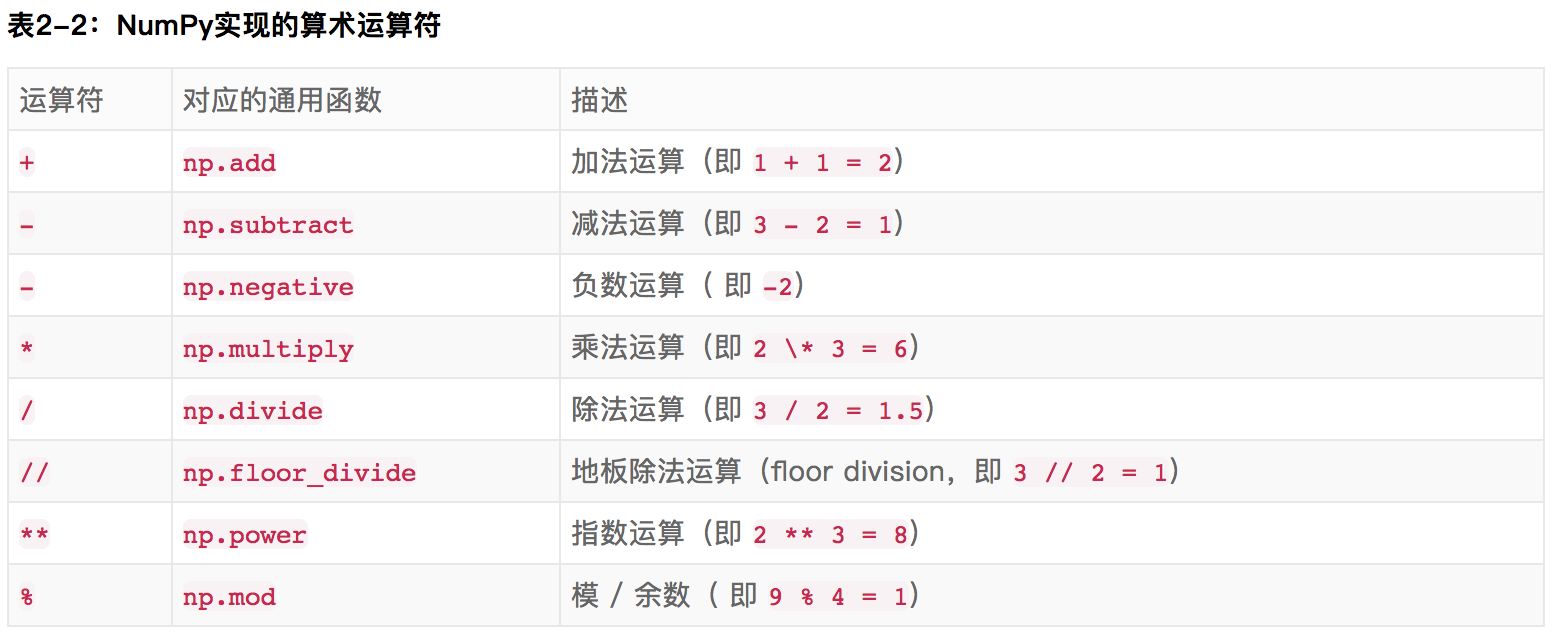

#### 2.3.3.2 绝对值
正如NumPy能理解Python内置的运算操作，NumPy也可以理解Python内置的绝对值函数：

In [64]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

对应的NumPy通用函数是`np.absolute`，该函数也可以用别名`np.abs`来访问：

In [65]:
np.absolute(x)

array([2, 1, 0, 1, 2])

这个通用函数也可以处理复数，当处理复数时，绝对值返回的是该复数的幅度：

In [66]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([ 5.,  5.,  2.,  1.])

#### 2.3.3.3 三角函数
NumPy提供了大量三角函数。首先定义一个角度数组：

In [67]:
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [ 0.          1.57079633  3.14159265]
sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]
cos(theta) =  [  1.00000000e+00   6.12323400e-17  -1.00000000e+00]
tan(theta) =  [  0.00000000e+00   1.63312394e+16  -1.22464680e-16]


这些值是在机器精度内计算的，所以有些应该是0的值并没有精确到0。逆三角函数同样可以使用：

In [68]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [ 3.14159265  1.57079633  0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


#### 2.3.3.4 指数和对数
NumPy中另一个常用的运算通用函数是指数运算：

In [69]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [  2.71828183   7.3890561   20.08553692]
2^x   = [ 2.  4.  8.]
3^x   = [ 3  9 27]


指数运算的逆运算，即对数运算也是可用的。最基本的`np.log`给出的是以自然数为底数的对数。也可以计算以2为底数或者以10为底数的对数：

In [70]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [ 0.          0.69314718  1.38629436  2.30258509]
log2(x)  = [ 0.          1.          2.          3.32192809]
log10(x) = [ 0.          0.30103     0.60205999  1.        ]


还有一些特殊的版本，对于非常小的输入值可以保持较好的精度。当x的值很小时，以上函数给出的值比`np.log`和`np.exp`的计算更精确:

In [71]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [ 0.          0.0010005   0.01005017  0.10517092]
log(1 + x) = [ 0.          0.0009995   0.00995033  0.09531018]


#### 2.3.3.5 专用的通用函数
NumPy还提供了很多通用函数，包括双曲三角函数、比特位运算、比较运算符、弧度转化为角度的运算、取整和求余运算，等等。浏览NumPy的文档将会揭示很多有趣的功能。

还有一个更加专用，也更加晦涩的通用函数优异来源是子模块`scipy.special`。如果你希望对你的数据进行一些更晦涩的数学计算，`scipy.special`可能包含了你需要的计算函数。这些函数能列一个长长的列表，下面的代码片段展示了一些可能在统计学中用到的函数：

In [72]:
from scipy import special

# Gamma函数（广义阶乘，generalized factorials）和相关函数
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [  1.00000000e+00   2.40000000e+01   3.62880000e+05]
ln|gamma(x)| = [  0.           3.17805383  12.80182748]
beta(x, 2)   = [ 0.5         0.03333333  0.00909091]


In [73]:
# 误差函数（高斯积分）的实现和它的逆实现
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [ 0.          0.32862676  0.67780119  0.84270079]
erfc(x) = [ 1.          0.67137324  0.32219881  0.15729921]
erfinv(x) = [ 0.          0.27246271  0.73286908         inf]


### 2.3.4 高级的通用函数特性
很多NumPy用户在没有完全了解通用函数的特性时就开始使用它们，这里将介绍一些通用函数的特殊性质。

#### 2.3.4.1 指定输出
在进行大量运算时，有时候指定一个用于存放运算结果的数组是非常有用的。不同于创建临时数组，你可以用这个特性将计算结果直接写入到你期望的存储位置。所有的通用函数都可以通过`out`参数来指定计算结果的存放位置：

In [74]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([  0.,  10.,  20.,  30.,  40.])

这个特性也可以被用作数组视图，例如可以将计算结果写入指定数组的每隔一个元素的位置：

In [75]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
y

array([  1.,   0.,   2.,   0.,   4.,   0.,   8.,   0.,  16.,   0.])

如果这里写的是
```python
y[::2] = 2 ** x
```
那么结果将是创建一个临时数组，该数组存放的是`2**x`的结果，并且接下来会将这些值复制到y数组中。对于较大的数组，慎重使用out参数将能够有效节约内存。

#### 2.3.4.2 聚合
二元通用函数有些非常有趣的聚合功能，这些聚合可以直接在对象上计算。例如，如果我们希望用一个特定的运算`reduce`一个数组，那么可以用任何通用函数的`reduce`方法。`reduce`方法会对给定的元素和操作重复执行，直至得到单个的结果：

In [76]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [77]:
np.multiply.reduce(x)

120

如果需要存储每次计算的中间结果，可以使用`accumulate`：

In [78]:
np.add.accumulate(x), np.multiply.accumulate(x)

(array([ 1,  3,  6, 10, 15]), array([  1,   2,   6,  24, 120]))

请注意，在一些特殊情况中，NumPy提供了专用的函数`np.sum`、`np.prod`、`np.cumsum`、`np.cumprod`，它们也可以实现以上`reduce`的功能，这些函数将在`2.4节`中具体介绍。

#### 2.3.4.3 外积
任何通用函数都可以用`outer`方法获得两个不同输入数组所有元素对的函数运算结果。这意味着你可以用一行代码实现一个乘法表：

In [79]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

通用函数另外一个非常有用的特性是它能操作不同大小和形状的数组，一组这样的操作被称为`广播`（broadcasting）。这个主题非常重要，我们将用一整节的内容介绍它（详情请参见`2.5节`）。

### 2.3.5 通用函数：更多的信息
通用函数的更多信息可以在[NumPy](http://www.numpy.org)和[SciPy](http://www.scipy.org)的网站找到。



## 2.4 聚合：最小值、最大值和其他值
当你面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计值。最常用的概括统计值有均值、标准差、求和、乘积、中位数、最小值和最大值、分位数，等等。

NumPy有非常快速的内置聚合函数可用于数组，我们将介绍其中的一些。

### 2.4.1 数组值求和
Python的`sum`函数和`np.sum`函数都可以求和，但是并不等同，这有时会导致混淆。它们各自的可选参数都有不同的含义，另外，`np.sum`函数是知道数组的维度的，这一点将在接下来的部分讲解。

In [80]:
L = np.random.random(100)
sum(L), np.sum(L)

(50.887726299150913, 50.887726299150927)

### 2.4.2 最小值和最大值
Python有内置的`min`函数和`max`函数，NumPy有对应的函数，而且执行得更快：

In [81]:
np.min(big_array), np.max(big_array)

(1, 99)

对于`min`、`max`、`sum`和其他NumPy聚合，一种更简洁的语法形式是数组对象直接调用这些方法：

In [82]:
big_array.min(), big_array.max(), big_array.sum()

(1, 99, 49988718)

#### 2.4.2.1 多维度聚合
一种常用的聚合操作是沿着一行或一列聚合：

In [83]:
M = np.random.random((3, 4))
M

array([[ 0.13531095,  0.88282561,  0.3126663 ,  0.49555108],
       [ 0.9552979 ,  0.81778172,  0.49902653,  0.22465879],
       [ 0.89005733,  0.30654364,  0.37441302,  0.75259926]])

In [84]:
# 默认情况下，聚合函数将会返回对整个数组的聚合结果
M.sum()

6.6467321299858124

In [85]:
# 聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合
# 例如，可以通过指定 axis=0 找到每一列的最小值
M.min(axis=0)

array([ 0.13531095,  0.30654364,  0.3126663 ,  0.22465879])

In [86]:
# 也可以找到每一行的最大值
M.max(axis=1)

array([ 0.88282561,  0.9552979 ,  0.89005733])

***axis关键字指定的是数组将会被折叠的维度，而不是将要返回的维度。因此指定axis=0意味着第一个轴将要被折叠——对于二维数组，这意味着每一列的值都将被聚合。***

#### 2.4.2.2 其他聚合函数
NumPy提供了很多其他聚合函数，但是这里不会详细地介绍它们。另外，大多数的聚合都有对`NaN值`的安全处理策略，即计算时忽略所有的缺失值。有些`NaN-safe`的函数直到`NumPy 1.8`版本才加进去。

`表2-3`提供了一个NumPy中可用的聚合函数的清单:
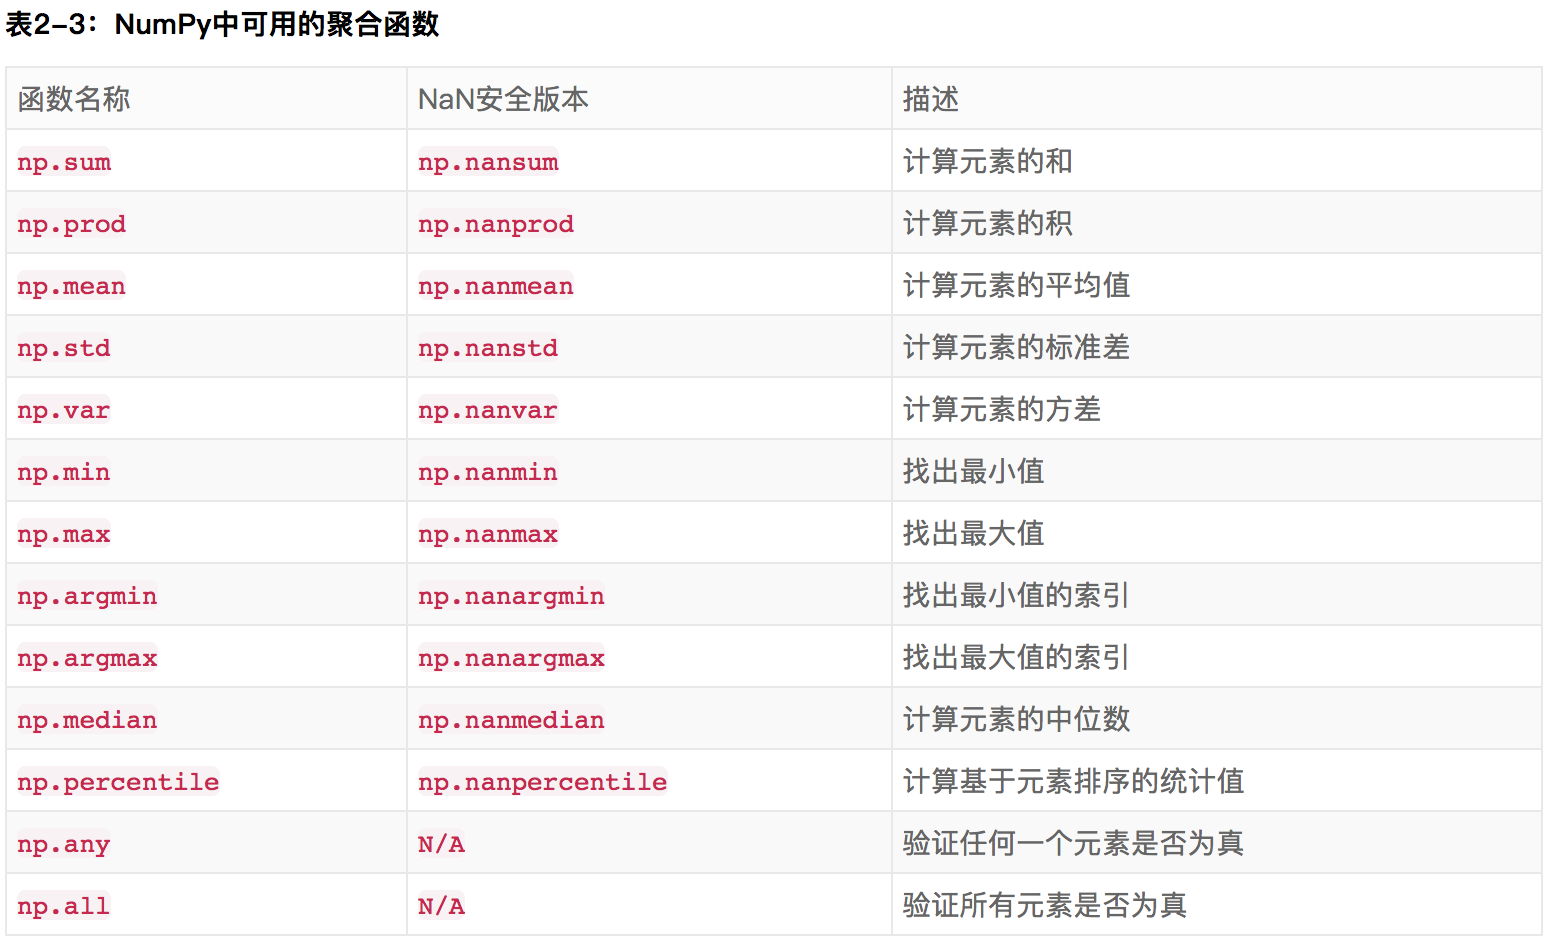



## 2.5 数组的计算：广播
广播可以简单理解为用于不同大小数组的二元通用函数（加、减、乘等）的一组规则。

### 2.5.1 广播的介绍
前面曾提到，NumPy对于同样大小的数组，二元操作是对相应元素逐个计算。广播允许这些二元操作可以用于不同大小的数组。例如，可以将一个标量和一个数组相加：

In [87]:
a = np.array([0, 1, 2]) 
a+5

array([5, 6, 7])

我们可以认为这个操作是将数值5扩展或重复至数组`[5, 5, 5]`，然后执行加法。 NumPy广播功能的好处是，这种对值的重复实际上并没有发生，但是这是一种很好用的理解广播的模型。

我们同样也可以将这个原理扩展到更高维度的数组：

In [88]:
M = np.ones((3, 3))
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

更复杂的情况会涉及对两个数组的同时广播:

In [89]:
a = np.arange(3) 
b = np.arange(3)[:, np.newaxis]
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

正如此前将一个值扩展或广播以匹配另外一个数组的形状，这里将a和b都进行了扩展来匹配一个公共的形状，最终的结果是一个二维数组。以上这些例子的几何可视化如`图2-4`所示(图中第三行有误，应该是arange()而不是ones())：
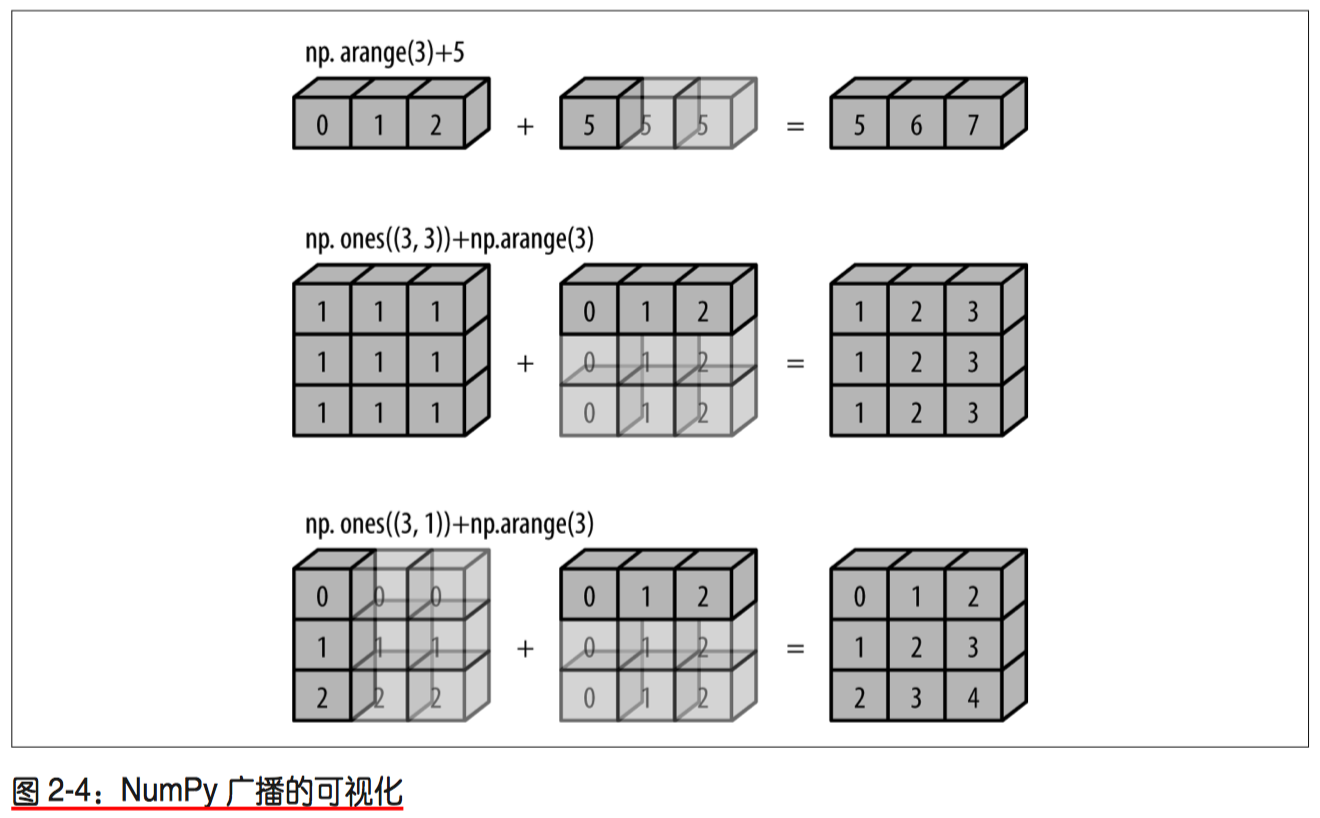

浅色的盒子表示广播的值，这个额外的内存并没有在实际操作中进行分配，但是这样的想象方式更方便我们从概念上理解。

### 2.5.2 广播的规则
NumPy的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作：
- 规则1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补1。
- 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的形状。
- 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常。

我们通过几个示例来说明上面的规则。

#### 2.5.2.1 广播示例1
将一个二维数组与一个一维数组相加：

In [90]:
M = np.ones((2, 3)) 
a = np.arange(3)
M+a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

来看这两个数组的加法操作。两个数组的形状如下：
```python
M.shape = (2, 3) 
a.shape = (3,)
```

根据规则1，数组a的维度数更小，所以在其左边补1：
```python
M.shape -> (2, 3) 
a.shape -> (1, 3)
```

根据规则2，第一个维度不匹配，因此扩展这个维度以匹配数组：
```python
M.shape -> (2, 3) 
a.shape -> (2, 3)
```

现在两个数组的形状匹配了，可以看到它们的最终形状都为(2, 3)。

#### 2.5.2.2 广播示例2
来看两个数组均需要广播的示例：

In [91]:
a = np.arange(3).reshape((3, 1)) 
b = np.arange(3)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

两个数组的形状为：
```python
a.shape = (3, 1) 
b.shape = (3,)
```

规则1告诉我们，需要用1将b的形状补全：
```python
a.shape -> (3, 1) 
b.shape -> (1, 3)
```

规则2告诉我们，需要更新这两个数组的维度来相互匹配：
```python
a.shape -> (3, 3) 
b.shape -> (3, 3)
```

#### 2.5.2.3 广播示例3
现在来看一个两个数组不兼容的示例：

In [92]:
M = np.ones((3, 2)) 
a = np.arange(3)
# 以下操作会报错！！
# M+a

两个数组的形状如下：
```python
M.shape = (3, 2) 
a.shape = (3,)
```

规则1告诉我们，a数组的形状必须用1进行补全：
```python
M.shape -> (3, 2) 
a.shape -> (1, 3)
```

根据规则2， a数组的第一个维度进行扩展以匹配M的维度：
```python
M.shape -> (3, 2) 
a.shape -> (3, 3)
```

现在需要用到规则3——最终的形状还是不匹配，因此这两个数组是不兼容的。

### 2.5.3 广播的实际应用
广播操作是本书中很多例子的核心，我们将通过几个简单的示例来展示广播功能的作用。

#### 2.5.3.1 数组的归一化
在前面的一节中，我们看到通用函数让NumPy用户免于写很慢的Python循环。 广播进一步扩展了这个功能，一个常见的例子就是数组数据的归一化。假设你有一个有10个观察特征的数组，每个特征包含3个数值：

In [93]:
X = np.random.random((5, 3))
print("X = ", X)

# 计算每个特征的均值，计算方法是利用mean函数沿着第一个维度聚合
Xmean = X.mean(0)
print("\nMean = ", Xmean)

# 现在通过从X数组的元素中减去这个均值实现归一化（该操作是一个广播操作）
X_centered = X - Xmean
print("\nX_centered = ", X_centered)

# 核对我们的处理是否正确，查看归一化的数组的均值是否接近0
# 在机器精度范围内，该均值为0
X_centered.mean(0)

X =  [[ 0.17746194  0.10144419  0.9999925 ]
 [ 0.78050216  0.06618773  0.6336205 ]
 [ 0.31063248  0.94833285  0.97968792]
 [ 0.24481674  0.62413396  0.75772597]
 [ 0.56219826  0.49924365  0.41224358]]

Mean =  [ 0.41512232  0.44786848  0.75665409]

X_centered =  [[-0.23766038 -0.34642429  0.24333841]
 [ 0.36537984 -0.38168074 -0.1230336 ]
 [-0.10448983  0.50046438  0.22303382]
 [-0.17030558  0.17626549  0.00107187]
 [ 0.14707595  0.05137517 -0.34441051]]


array([  3.33066907e-17,   4.44089210e-17,  -6.66133815e-17])

#### 2.5.3.2 画一个二维函数
广播另外一个非常有用的地方在于，它能基于二维函数显示图像。我们希望定义一个函数$z = f(x, y)$，可以用广播沿着数值区间计算该函数：

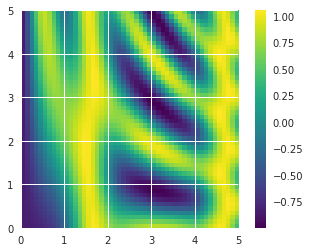

In [94]:
# x和y表示0~5区间50个步长的序列
x = np.linspace(0, 5, 50) 
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis') 
plt.colorbar()
plt.show()

## 2.6 比较、掩码和布尔逻辑
这一节将会介绍如何用布尔掩码来查看和操作NumPy数组中的值。当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。例如你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常点。在NumPy中，布尔掩码通常是完成这类任务的最高效方式。

### 2.6.1 示例：统计下雨天数
假设你有一系列表示某城市一年内日降水量的数据，包含365个值，降水量的单位是英寸：

In [95]:
# 利用Pandas抽取降雨量，放入一个NumPy数组 
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values 
inches = rainfall / 254 # 1/10mm -> inches 
inches.shape

(365,)

首先进行可视化：

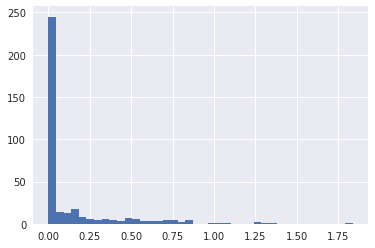

In [96]:
plt.hist(inches, 40)
plt.show()

该直方图表明了这些数据的大意：尽管人们对西雅图市有刻板印象，但是2014年它大多数时间的降水量都是接近0的。但是这样做并没有很好地传递出我们希望看到的某些信息，例如一年中有多少天在下雨，这些下雨天的平均降水量是多少，有多少天的降水量超过了半英寸？

**深入数据**
回答以上问题的一种方法是通过传统的统计方式，即对所有数据循环，当碰到数据落在我们希望的区间时计数器便加1。无论从编写代码的角度看，还是从计算结果的角度看，这都是一种非常低效的方法。NumPy的通用函数可以用来替代循环，以快速实现数组的逐元素（elementwise）运算。


### 2.6.2 和通用函数类似的比较操作
我们看到用`+、-、*、/`和其他一些运算符实现了数组的逐元素操作。NumPy还实现了如`<、>`的逐元素比较的通用函数。这些比较运算的结果是一个布尔数据类型的数组。一共有6种标准的比较操作：

In [97]:
x = np.array([1, 2, 3, 4, 5])
x < 3, x > 3, x != 3

(array([ True,  True, False, False, False], dtype=bool),
 array([False, False, False,  True,  True], dtype=bool),
 array([ True,  True, False,  True,  True], dtype=bool))

利用复合表达式实现对两个数组的逐元素比较也是可行的：

In [98]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

和算术运算符一样，比较运算操作在NumPy中也是借助通用函数来实现的：
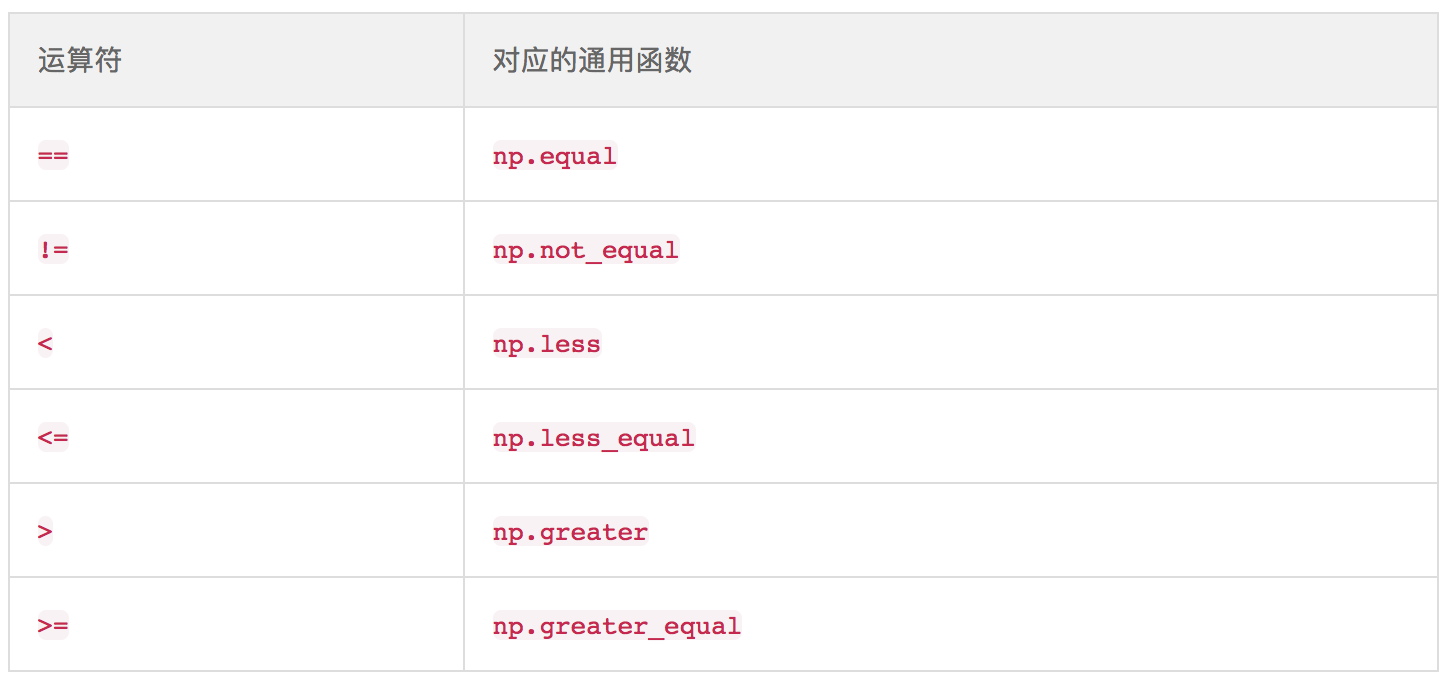

比较运算通用函数也可以用于任意形状、大小的数组：

In [99]:
rng = np.random.RandomState(0) 
x = rng.randint(10, size=(3, 4)) 
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [100]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

这样每次计算的结果都是布尔数组了。NumPy提供了一些简明的模式来操作这些布尔结果。

### 2.6.3 操作布尔数组
给定一个布尔数组，你可以实现很多有用的操作。

#### 2.6.3.1 统计记录的个数
如果需要统计布尔数组中`True`记录的个数，可以使用`np.count_nonzero`函数：

In [101]:
# 有多少值小于6？ 
np.count_nonzero(x < 6)

8

In [102]:
# 另外一种实现方式是利用np.sum，False会被解释成0，True会被解释成1
np.sum(x < 6)

8

sum()的好处是，和其他NumPy聚合函数一样，这个求和也可以沿着行或列进行：

In [103]:
# 每行有多少值小于6？ 注意，axis表示压缩的方向
np.sum(x < 6, axis=1)

array([4, 2, 2])

如要快速检查任意或者所有这些值是否为`True`，可以用`np.any()`或`np.all()`：

In [104]:
np.any(x > 8), np.all(x < 10)

(True, True)

`np.all()`和`np.any()`也可以用于沿着特定的坐标轴:

In [105]:
# 是否每行的所有值都小于8？ 
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

最后需要提醒的是，Python有内置的`sum()`、`any()`和`all()`函数，这些函数在NumPy中有不同的语法版本。如果在多维数组上混用这两个版本，会导致失败或产生不可预知的错误结果。因此，确保在以上的示例中用的都是`np.sum()`、`np.any()`和`np.all()`函数。

#### 2.6.3.2 布尔运算符
如果我们想统计降水量小于4英寸且大于2英寸的天数该如何操作呢？这可以通过NumPy通用函数实现数组的逐位运算（通常是布尔运算）：

In [106]:
np.sum((inches > 0.5) & (inches < 1))

29

请注意，这些括号是非常重要的，因为有运算优先级规则。如果去掉这些括号，该表达式会变成以下形式，这会导致运行错误：
```python
inches > (0.5 & inches) < 1
```

将比较运算符和布尔运算符合并起来用在数组上，可以实现更多有效的逻辑运算操作。以下表格总结了逐位的布尔运算符和其对应的通用函数:
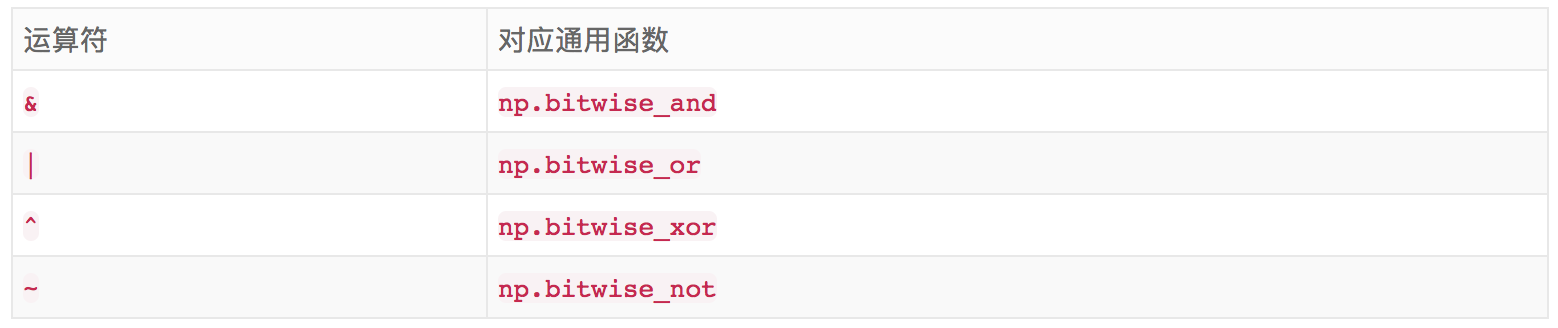

利用这些工具，就可以回答那些关于天气数据的问题了。以下的示例是结合使用掩码和聚合实现的结果计算：

In [107]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0)) 
print("Days with more than 0.5 inches:", np.sum(inches > 0.5)) 
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


### 2.6.4 将布尔数组作为掩码
在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据集。例如前面的例子中，我们通过布尔操作通用函数获取所有小于5的元素：

In [108]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

现在为了将这些值从数组中选出，可以进行简单的索引，即掩码操作：

In [109]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

上述代码返回的是一个一维数组，它包含了所有满足条件的值。换句话说，所有的这些值是掩码数组对应位置为`True`的值。

现在，可以对这些值做任意操作，例如可以根据西雅图降水数据进行一些相关统计：

In [110]:
# 为所有下雨天创建一个掩码 
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码（6月21日是第172天） 
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy])) 
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer])) 
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer])) 
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.194881889764
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


## 2.7 花哨的索引
在前面的小节中，我们看到了如何利用简单的索引值、切片和布尔掩码获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

### 2.7.1 探索花哨的索引
花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。 例如以下数组：

In [111]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

假设我们希望获得三个不同的元素：

In [112]:
# 方式一
[x[3], x[7], x[2]]

[71, 86, 14]

In [113]:
# 方式二
ind = [3, 7, 4] 
x[ind]

array([71, 86, 60])

利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

In [114]:
ind = np.array([[3, 7], [4, 5]]) 
x[ind]

array([[71, 86],
       [60, 20]])

花哨的索引也对多个维度适用：

In [115]:
X = np.arange(12).reshape((3, 4)) 
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [116]:
# 和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列
row = np.array([0, 1, 2]) 
col = np.array([2, 1, 3]) 

# 结果的第一个值是 X[0, 2]，第二个值是 X[1, 1]，第三个值是 X[2, 3]
X[row, col]

array([ 2,  5, 11])

在花哨的索引中，索引值的配对遵循`2.5节`介绍过的广播的规则。因此当我们将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果：

In [117]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状。

### 2.7.2 组合索引
花哨的索引可以和其他索引方案结合起来形成更强大的索引操作： 

In [118]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [119]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [120]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [121]:
mask = np.array([1, 0, 1, 0], dtype=bool) 
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### 2.7.3 示例：选择随机点
花哨的索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个$N*D$的矩阵，表示在$D$个维度的$N$个点。以下是一个二维正态分布的点组成的数组：

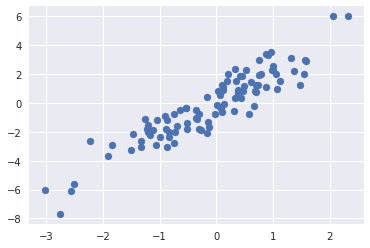

In [122]:
mean = [0, 0]
cov = [[1, 2], [2, 5]] 
X = rand.multivariate_normal(mean, cov, 100) 

plt.scatter(X[:, 0], X[:, 1])
plt.show()

我们将利用花哨的索引随机选取20个点——选择20个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值：

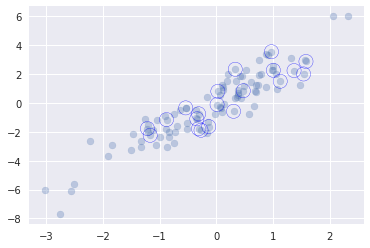

In [123]:
indices = np.random.choice(X.shape[0], 20, replace=False) 
selection = X[indices] 

# 现在来看哪些点被选中了，将选中的点在图上用大圆圈标示出来
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='b', s=200)
plt.show()

这种方法通常用于快速分割数据，即需要分割训练/测试数据集以验证统计模型（详情请参见`5.3节`）时，以及在解答统计问题时的抽样方法中使用。

### 2.7.4 用花哨的索引修改值
正如花哨的索引可以被用于获取部分数组，它也可以被用于修改部分数组：

In [124]:
x = np.arange(10)
i = np.array([2, 1, 8, 4]) 
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

***不过需要注意，操作中重复的索引会导致一些出乎意料的结果产生，如以下例子所示：***

In [125]:
x = np.zeros(10)
# 首先赋值x[0]=4，然后赋值x[0]=6
x[[0, 0]] = [4, 6]
x

array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

以上还算合理，但是设想以下操作：

In [126]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

你可能期望`x[3]=2`，`x[4]=3`，因为这是这些索引值重复的次数。但是为什么结果不同于我们的预想呢？从概念的角度理解，这是因为`x[i]+=1`是`x[i]=x[i]+1`的简写。`x[i]+1`计算后，这个结果被赋值给了`x`相应的索引值。记住这个原理后，我们却发现数组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。

因此，如果你希望累加，该怎么做呢？你可以借助通用函数中的`at()`方法来实现：

In [127]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([ 0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.])

`at()`函数在这里对给定的操作、给定的索引（这里是i）以及给定的值（这里是1）执行的是就地操作。另一个可以实现该功能的类似方法是通用函数中的`reduceat()`函数。

### 2.7.5 示例：数据区间划分
你可以用这些方法有效地将数据进行区间划分并手动创建直方图。例如，假定我们有1000个值，希望快速统计分布在每个区间中的数据频次，可以用`ufunc.at`来计算：

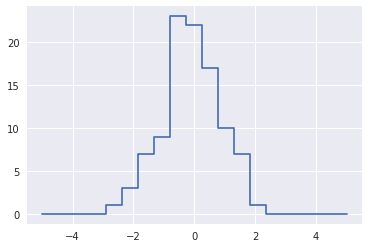

In [128]:
np.random.seed(42) 
x = np.random.randn(100)

# 手动计算直方图 
bins = np.linspace(-5, 5, 20) 
counts = np.zeros_like(bins)

# 为每个x找到合适的区间 
i = np.searchsorted(bins, x)

# 为每个区间加上1 
np.add.at(counts, i, 1)

# counts反映的是在每个区间中的点的个数，即直方图分布
plt.plot(bins, counts, linestyle='steps')
plt.show()

## 2.8 数组的排序
这一节将介绍用于排序NumPy数组的相关算。

### 2.8.1 NumPy中的快速排序
NumPy有`np.sort`和`np.argsort`方法实现快速排序。默认情况下，`np.sort`的排序算法是快速排序，其算法复杂度为$O[NlogN]$，另外也可以选择归并排序和堆排序。对于大多数应用场景，默认的快速排序已经足够高效了。

如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用`np.sort`：

In [129]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)
x

array([2, 1, 4, 3, 5])

In [130]:
# 如果希望用排好序的数组替代原始数组，可以使用数组的 sort 方法
x.sort()
x

array([1, 2, 3, 4, 5])

In [131]:
# argsort返回的是原始数组排好序的索引值
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [132]:
# 这些索引值可以被用于（通过花哨的索引）创建有序的数组
x[i]

array([1, 2, 3, 4, 5])

NumPy排序算法的一个有用的功能是通过`axis`参数，沿着多维数组的行或列进行排序。需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将会丢失：

In [133]:
rand = np.random.RandomState(42) 
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [134]:
# 对X的每一列排序 
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [135]:
# 对X每一行排序 
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 2.8.2 部分排序：分隔
有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K小的值，NumPy的`np.partition`函数提供了该功能。`np.partition`函数的输入是数组和数字K，输出结果是一个新数组，最左边是第K小的值，往右是任意顺序的其他值：

In [136]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

**请注意，结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值。在这两个分隔区间中，元素都是任意排列的。**

与排序类似，也可以沿着多维数组任意的轴进行分隔：

In [137]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分布在剩下的位置。

最后，正如`np.argsort`函数计算的是排序的索引值，`np.argpartition`函数计算的是分隔的索引值，我们将在下一节中举例介绍它。

### 2.8.3 示例：K个最近邻
以下示例展示的是如何利用`argsort`函数沿着多个轴快速找到集合中每个点的最近邻。首先，在二维平面上创建一个有10个随机点的集合：

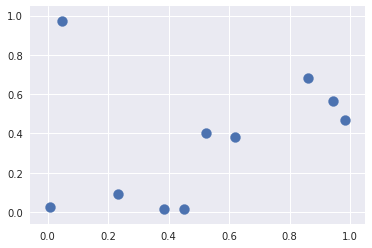

In [138]:
X = rand.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

现在来计算两两数据点对间的距离(即每个维度的距离差的平方的和)。利用NumPy的广播和聚合功能，可以用一行代码计算矩阵的平方距离：
```python
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
```

这个操作看起来有些令人困惑。当你遇到这种代码时，将其各组件分解后再分析是非常有用的：

In [139]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [140]:
# 求出差值的平方
sq_differences = differences ** 2 
sq_differences.shape

(10, 10, 2)

In [141]:
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1) 
dist_sq.shape

(10, 10)

In [142]:
# 应该看到该矩阵的对角线（也就是每个点到其自身的距离）的值都是0
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [143]:
# 当我们有了这样一个转化为两点间的平方距离的矩阵后，就可以使用np.argsort函数沿着
# 每行进行排序了。最左边的列给出的索引值就是最近邻
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

需要注意的是，第一列是按`0~9`从小到大排列的。这是因为每个点的最近邻是其自身。

如果使用全排序，我们实际上可以实现的比这个例子展示的更多。如果我们仅仅关心`k`个最近邻， 那么唯一需要做的是分隔每一行，这样最小的`k+1`的平方距离将排在最前面，其他更长的距离占据矩阵该行的其他位置。可以用`np.argpartition`函数实现：

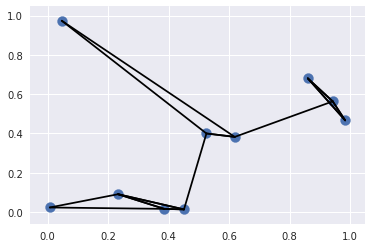

In [144]:
K = 2 
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s=100)

# 将每个点与它的两个最近邻连接
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段 
        # 用zip方法实现
        plt.plot(*zip(X[j], X[i]), color='black')
plt.show()

图中每个点和离它最近的两个节点用连线连接。你可能会奇怪为什么有些点的连线多于两条，这是因为点A是点B最邻近的两个节点之一，但是并不意味着点B一定是点A的最邻近的两个节点之一。

尽管本例中的广播和按行排序可能看起来不如循环直观，但是在实际运行中，Python中这类数据的操作会更高效。你可能会尝试通过手动循环数据并对每一组邻节点单独进行排序来实现同样的功能，但是这种方法和我们使用的向量化操作相比，肯定在算法执行上效率更低。并且向量化操作的优美之处在于，它的实现方式决定了它对输入数据的数据量并不敏感。也就是说，我们可以非常轻松地计算任意维度空间的100或1000000个邻节点，而代码看起来是一样的。

最后还想提醒一点，做大数据量的最近邻搜索时，有几种基于树的算法的算法复杂度可以实现接近$\mathcal{O}[NlogN]$，或者比暴力搜索法的$\mathcal{O}[N^2]$更好，其中一种就是`KD-Tree`。

## 2.9 结构化数据：NumPy的结构化数组
大多数时候，我们的数据可以通过一个异构类型值组成的数组表示，但有时却并非如此。本节介绍NumPy的结构化数组和记录数组，它们为复合的、异构的数据提供了非常有效的存储。尽管这里列举的模式对于简单的操作非常有用，但是这些场景通常也可以用Pandas的DataFrame来实现。

假定现在有关于一些人的分类数据(如姓名、年龄和体重)，一种可行的方法是将它们存在三个单独的数组中：
```python
name = ['Alice', 'Bob', 'Cathy', 'Doug'] 
age = [25, 45, 37, 19] 
weight = [55.0, 85.5, 68.0, 61.5]
```

这种方法有点笨，因为并没有任何信息告诉我们这三个数组是相关联的。NumPy可以用结构化数组实现这种存储：

In [145]:
# 使用复合数据结构的结构化数组
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 
                          'formats':('U10', 'i4', 'f8')}) 
# U10表示“长度不超过10的Unicode 字符串”
# i4 表示“4字节整型”
# f8 表示“8字节浮点型”
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [160]:
data['name'] = ['Alice', 'Bob', 'Cathy', 'Doug'] 
data['age'] = [25, 45, 37, 19] 
data['weight'] = [55.0, 85.5, 68.0, 61.5]
data

array([('Alice', 25,  55. ), ('Bob', 45,  85.5), ('Cathy', 37,  68. ),
       ('Doug', 19,  61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

结构化数组的方便之处在于，你可以通过索引或名称查看相应的值：

In [147]:
# 获取所有名字
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'],
      dtype='<U10')

In [148]:
# 获取数据第一行 
data[0]

('Alice', 25,  55.)

In [149]:
# 获取最后一行的名字 
data[-1]['name']

'Doug'

In [150]:
# 利用布尔掩码，还可以做一些更复杂的操作，如按照年龄进行筛选
# 获取年龄小于30岁的人的名字
data[data['age'] < 30]['name']

array(['Alice', 'Doug'],
      dtype='<U10')

如果你希望实现比上面更复杂的操作，那么你应该考虑使用Pandas包。Pandas提供了一个DataFrame对象，该结构是构建于NumPy数组之上的，提供了很多有用的数据操作功能。

### 2.9.1 生成结构化数组
结构化数组的数据类型有多种制定方式。此前我们看过了采用字典的方法：

In [151]:
np.dtype({'names':('name', 'age', 'weight'), 
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [152]:
# 数值数据类型可以用Python类型或NumPy的dtype类型指定
np.dtype({'names':('name', 'age', 'weight'), 
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [153]:
# 复合类型也可以是元组列表
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [154]:
# 如果类型的名称对你来说并不重要，那你可以仅仅用一个字符串来指定它
# 在该字符串中数据类型用逗号分隔
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

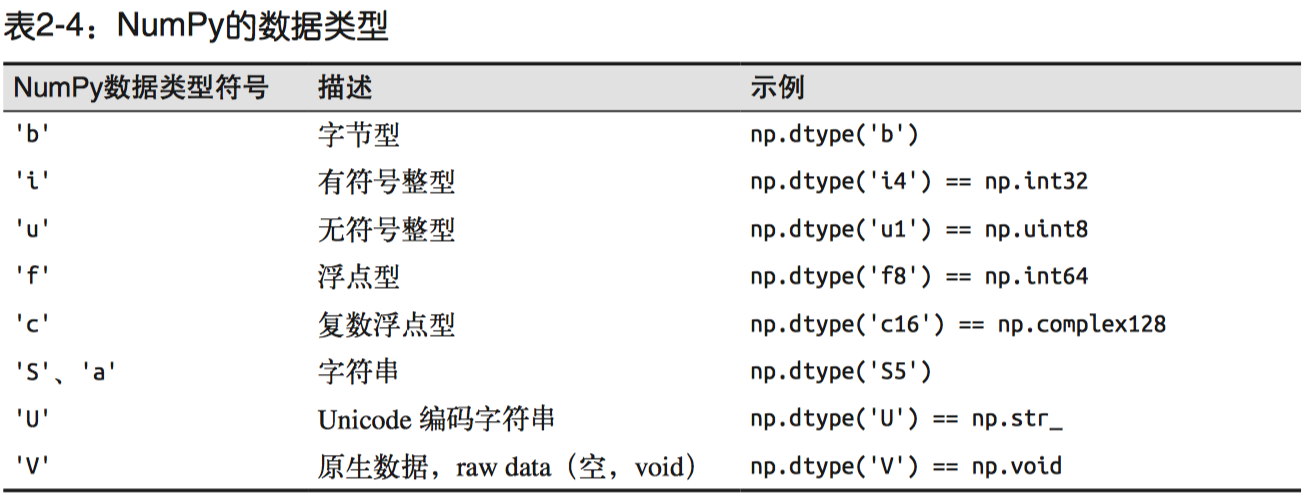

### 2.9.2 更高级的复合类型
NumPy 中也可以定义更高级的复合数据类型。例如，你可以创建一种类型，其中每个元素都包含一个数组或矩阵：

In [155]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))]) 
X = np.zeros(1, dtype=tp) 
X

array([(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])],
      dtype=[('id', '<i8'), ('mat', '<f8', (3, 3))])

现在X数组的每个元素都包含一个`id`和一个`3×3`的矩阵。为什么我们宁愿用这种方法存储数据，也不用简单的多维数组，或者Python字典呢？原因是NumPy的dtype直接映射到C结构的定义，因此包含数组内容的缓存可以直接在C程序中使用。

### 2.9.3 记录数组：结构化数组的扭转
NumPy还提供了`np.recarray`类。它和前面介绍的结构化数组几乎相同，但是它有一个独特的特征：域可以像属性一样获取，而不是像字典的键那样获取。前面的例子通过以下代码获取年龄：

In [156]:
data['age']

array([25, 45, 37, 19], dtype=int32)

如果将这些数据当作一个记录数组，我们可以用很少的按键来获取这个结果：

In [157]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

记录数组的不好的地方在于，即使使用同样的语法，在获取域时也会有一些额外的开销，如以下示例所示：

In [158]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

167 ns ± 0.0433 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
3.78 µs ± 5.99 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.82 µs ± 7.99 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
